In [2]:
import tempfile
import pandas as pd
from pycaret.regression import RegressionExperiment

# Index

1. [Crear un experimento](#1---Crear-un-experimento)

    1.1 [Leer los datos](#1.1-Leer-los-datos)
    
    1.2 [Crear experimento](#1.2---Crear-experimento)

    1.3 [Resultados del experimento](#1.3---Resultados-del-experimento)
.

2. [Crear un experimento](#2---Crear-un-modelo)

    2.1 [Elegir modelo](#2.1---Elegir-modelo)
    
    2.2 [Analizar los resultados](#2.2---Analizar-los-resultados)

    2.3 [Guardar el modelo](#2.3---Guardar-el-modelo)

.

3. [Usar el modelo](#3---Usar-el-modelo)

    3.1 [Cargar el modelo](#3.1---Cargar-el-modelo)
    
    3.2 [Calcular predicciones](#3.2---Calcular-predicciones)

    3.3 [Servicio de predicción](#3.3---Servicio-de-predicción)

---

# 1 - Crear un experimento

## 1.1 Leer los datos

In [3]:
data = pd.read_csv('../data/housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 1.2 - Crear experimento

In [4]:
experiment = RegressionExperiment()

# Ejecutamos el experimento
experiment.setup(
    data,
    target = 'median_house_value',
    log_experiment = True,
    session_id = 123)

,Description,Value
0,Session id,123
1,Target,median_house_value
2,Target type,Regression
3,Original data shape,"(20640, 10)"
4,Transformed data shape,"(20640, 14)"
5,Transformed train set shape,"(14447, 14)"
6,Transformed test set shape,"(6193, 14)"
7,Numeric features,8
8,Categorical features,1
9,Rows with missing values,1.0%


2023/05/05 11:58:47 INFO mlflow.tracking.fluent: Experiment with name 'reg-default-name' does not exist. Creating a new experiment.


## 1.3 - Resultados del experimento

In [5]:
experiment.models().head()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True


In [6]:
experiment.get_logs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,params.Rows with missing values,params.Fold Generator,params.Transformed test set shape,params.Log Experiment,...,tags.mlflow.runName,tags.mlflow.source.git.commit,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.source.name,tags.Source,tags.Run ID,tags.URI,tags.USI,tags.Run Time
0,d9e1023ad9a1439badb81d245de36958,1,RUNNING,file:///home/adelgado/Documentos/geekshub_mlop...,2023-05-05 09:58:47.466000+00:00,None,1.0%,KFold,"(6193, 14)",MlflowLogger,...,Session Initialized 9bbb,5debc947395ec21b83fca0bec40e3221e68b581b,LOCAL,adelgado,/home/adelgado/Documentos/geekshub_mlops/01_py...,setup,d9e1023ad9a1439badb81d245de36958,37ad0e00,None,1.68


In [7]:
experiment.get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Custom
ID,,,,,,,,
mae,MAE,MAE,<function mean_absolute_error at 0x7f6399bc5160>,neg_mean_absolute_error,pred,{},False,False
mse,MSE,MSE,<function mean_squared_error at 0x7f6399bc5310>,neg_mean_squared_error,pred,{},False,False
rmse,RMSE,RMSE,<function mean_squared_error at 0x7f6399bc5310>,neg_root_mean_squared_error,pred,{'squared': False},False,False
r2,R2,R2,<function r2_score at 0x7f6399bc55e0>,r2,pred,{},True,False
rmsle,RMSLE,RMSLE,<function RMSLEMetricContainer.__init__.<local...,"make_scorer(root_mean_squared_log_error, great...",pred,{},False,False
mape,MAPE,MAPE,<function MAPEMetricContainer.__init__.<locals...,"make_scorer(mean_absolute_percentage_error, gr...",pred,{},False,False


---

## 2 - Crear el modelo

## 2.1 - Elegir modelo

In [8]:
rf_model = experiment.create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31945.6119,2414809606.6712,49140.7123,0.8326,0.2357,0.1788
1,32115.3019,2317039190.6719,48135.6333,0.8278,0.2250,0.1698
2,32287.5545,2497903648.2473,49979.0321,0.8126,0.2369,0.1749
3,32674.8270,2656659515.8469,51542.7931,0.8121,0.2391,0.1772
4,31745.3915,2376334756.4548,48747.6641,0.8288,0.2342,0.1756
5,33438.3678,2550486458.2286,50502.3411,0.7893,0.2487,0.1879
6,33188.1783,2551998393.5456,50517.3079,0.8059,0.2538,0.1939
7,32773.9701,2459451531.2891,49592.8577,0.8142,0.2485,0.1887
8,33434.7942,2673168412.2684,51702.6925,0.7928,0.2528,0.1895


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## 2.2 - Analizar los resultados

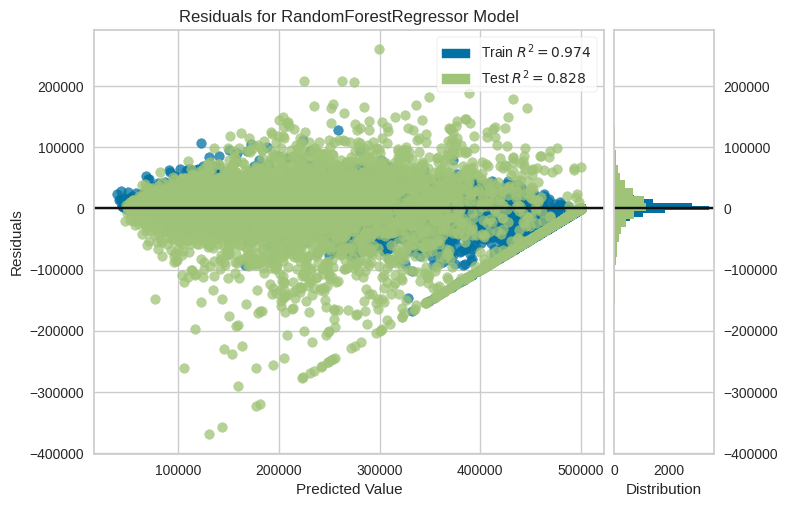

In [10]:
experiment.plot_model(rf_model, plot = 'residuals')

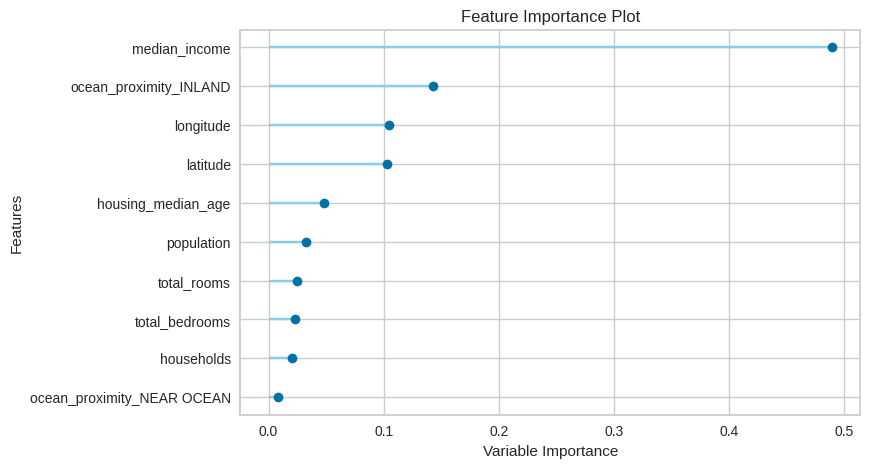

In [12]:
experiment.plot_model(rf_model, plot = 'feature')

## 2-3 Guardar el modelo

In [ ]:
experiment.save_model(best_model, 'housing_model')

---

# 3 - Usar el modelo

## 3.1 - Cargar el modelo

In [ ]:
experiment = ClassificationExperiment()

experiment.setup(
    data,
    target = 'median_house_value',
    log_experiment = True,
    session_id = 123)

model = experiment.load_model('housing_model')

## 3.2 - Calcular predicciones 

In [ ]:
pred = experiment.predict_model(model, data)
pred

In [ ]:
file = experiment.check_drift(
    reference_data = data.head(100),
    current_data = data.tail(100),
    target = 'median_house_value')

## 3.3 - Servicio de predicción

In [ ]:
with tempfile.TemporaryDirectory() as tmpdirname:
    experiment.create_api(model, f"{tmpdirname}/housing_api")
    file = f"{tmpdirname}/housing_api.py"
    !python {file}